# Taming Text

In [27]:
# Normal stack of pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import nltk
from os import path
from wordcloud import WordCloud # pip install wordcloud
from PIL import Image

%matplotlib inline

First and foremost lets just load the data:

In [28]:
folder = 'hillary-clinton-emails/'
aliases = pd.read_csv(folder + 'Aliases.csv', index_col='Id')
email_receivers = pd.read_csv(folder + 'EmailReceivers.csv', index_col='Id')
emails = pd.read_csv(folder + 'Emails.csv', index_col='Id')
persons = pd.read_csv(folder + 'Persons.csv', index_col='Id')

In [29]:
aliases.head()

,Alias,PersonId
Id,,
1,111th congress,1
2,agna usemb kabul afghanistan,2
3,ap,3
4,asuncion,4
5,alec,5


In [30]:
email_receivers.head()

,EmailId,PersonId
Id,,
1,1,80
2,2,80
3,3,228
4,3,80
5,4,80


In [31]:
emails.head()

,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
Id,,,,,,,,,,,,,,,,,,,,,
1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [32]:
emails.columns

Index(['DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

In [33]:
emailsList = emails['ExtractedBodyText'].tolist()
cleanedList = [str(x) for x in emailsList if str(x) != 'nan']

In [34]:
rawExtractedBody = ' '.join(cleanedList)

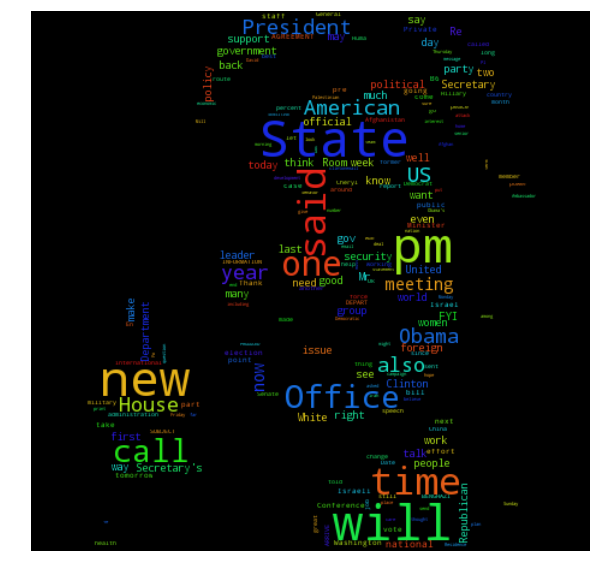

In [35]:
def generate_word_cloud(text):
    mask = np.array(Image.open("hillary_mask_1.jpg"))
    
    # Generate a word cloud image
    wordcloud = WordCloud(mask=mask).generate(text)
    
    # Display the generated image:
    plt.imshow(wordcloud)
    plt.axis("off")
    
    fig = plt.gcf()
    fig.set_size_inches(10,10)

    '''
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40, mask=mask).generate(text)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    '''
    
generate_word_cloud(rawExtractedBody)

## Preprosessing

- Tokenizing
- Stemming
- Stop word removal

In [36]:
from nltk.tokenize import word_tokenize

tokens = pd.Series(word_tokenize(rawExtractedBody))
tokens.head()

0          B6
1    Thursday
2           ,
3       March
4           3
dtype: object

In [37]:
lowered_tokens = tokens.apply(lambda token: token.strip().lower())

lowered_tokens = lowered_tokens[lowered_tokens != '']
lowered_tokens.head()

0          b6
1    thursday
2           ,
3       march
4           3
dtype: object

### Removing non-english words

In [38]:
from nltk.corpus import words
print(words.readme())

english = set(words.words())

Wordlists

en: English, http://en.wikipedia.org/wiki/Words_(Unix)
en-basic: 850 English words: C.K. Ogden in The ABC of Basic English (1932)



In [39]:
english = set(words.words())
filter_english = lowered_tokens.apply(lambda x: x in english)

valid_tokens = lowered_tokens[filter_english]
valid_tokens.head(10)

3      march
9          h
11    latest
12       how
14        is
17       and
18      more
22      memo
29      memo
34     march
dtype: object

### Remove 'short' words

Under the assumption that words with length <= 3 contains no or little expressiveness, we chose to remove them:

In [40]:
short_filter = valid_tokens.apply(lambda token: len(token) > 3)

long_tokens = valid_tokens[short_filter]
long_tokens.head()

3      march
11    latest
18      more
22      memo
29      memo
dtype: object

### Stopword removal

In [41]:
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

stopword_filter = long_tokens.apply(lambda x: x not in stop)
nonstop_tokens = long_tokens[stopword_filter]

In [42]:
nonstop_tokens.head(15)

3          march
11        latest
22          memo
29          memo
34         march
50         march
62        latest
74          memo
80         print
83         print
107         meet
110    extremist
111       behind
113         film
115      sparked
dtype: object

In [43]:
print('Our cleaning took away %.2f%% of the words' % (100*(1 - nonstop_tokens.shape[0] / tokens.shape[0])))

Our cleaning took away 71.97% of the words


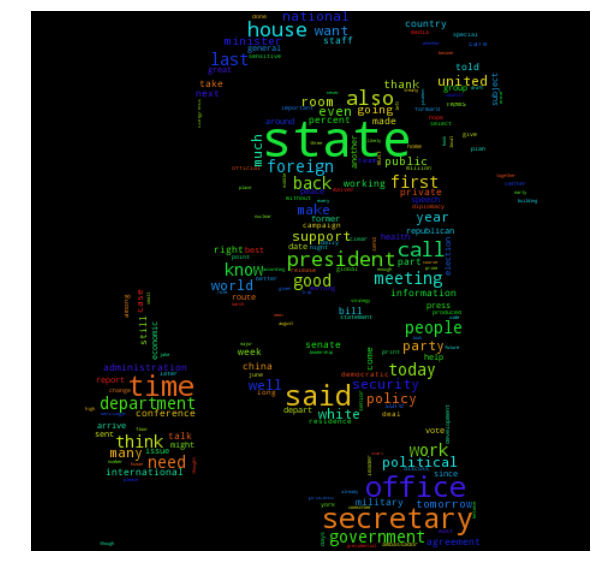

In [44]:
generate_word_cloud(nonstop_tokens.to_string(index=False, header=False))

## 2.


In [84]:
emailsList = pd.Series(emails['ExtractedBodyText'].astype(str))


In [85]:
# Drop nans
emailsList = emailsList[emailsList.apply(lambda x: x != 'nan')]



### Country lookup

In [86]:
import pycountry # pip install pycountry
len(pycountry.countries)

249

In [87]:
countries = [{'name': c.name, 'short_name': c.alpha_2} for c in pycountry.countries]

In [88]:
import re

def lookup_country(email):
    counts = {}
    
    words = re.findall(r"[\w']+", email)
    for country in countries:
        count = 0
        
        count += email.count(country['name'])
        # count += words.count( country['short_name'] )
        
        
        # Count allso shortnames for UK and USA
        if country['name'] == 'United States':
            count += words.count('USA')
            count += words.count('US')
            count += words.count('U.S.')
            count += words.count('U.S.A')
            
        elif country['name'] == 'United Kingdom':
            count += words.count('UK')
            count += words.count('U.K.')
            count += words.count('GB')
            count += words.count('G.B.')
        
        
        if count != 0:
            counts[country['name']] = count
            
    if counts:
        # Get the country with highest count  
        top_country = max(counts, key=counts.get)
        return top_country
    else:
        return

In [89]:
lookup_country("Norway United States Poland Poland Poland Norway, GB, UK, USA")

'Poland'

In [90]:
country_mentioned = emailsList.apply(lookup_country)

In [91]:
country_mentioned.value_counts()

United States         139
Israel                 76
Haiti                  69
Libya                  53
Pakistan               49
Afghanistan            46
China                  41
United Kingdom         30
India                  26
Iraq                   22
Ireland                20
Honduras               20
Mexico                 17
Turkey                 17
Egypt                  14
Qatar                  12
Cuba                   11
Palau                  10
Sri Lanka              10
Brazil                  9
Sudan                   8
Colombia                8
Ukraine                 7
Singapore               7
Angola                  6
Germany                 6
South Africa            5
Chile                   5
Armenia                 5
Jersey                  5
                     ... 
Portugal                1
Zambia                  1
Azerbaijan              1
Cameroon                1
Senegal                 1
Oman                    1
Rwanda                  1
Cambodia    

### TODO: problem 'fixed', but can be mentioned in discussion
Problem with current approach:
    - Tokenization causes country names to become seperated -> 'United States' becomes 'United', 'States' and thus pycountry.countries.lookup fails for such cases
    - there are a lot of abbreviations as PM (prime minister ?) which are actual countries abbreviations (Saint Pierre and Miquelon) but we cannot simply get rid of all the abbreviations since USA or UK is widely used.

## Sentimental analyzis

### Step 1: Cleaning

In [96]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [97]:
tokenized = emailsList.apply(word_tokenize)
tokenized.head()

Id
2    [B6, Thursday, ,, March, 3, ,, 2011, 9:45, PM,...
3                                                [Thx]
5    [H, <, hrod17, @, clintonemail.com, >, Friday,...
6    [Pis, print, ., -•-, ..., -^, H, <, hrod17, @,...
8    [H, <, hrod17, @, clintonemail.corn, >, Friday...
Name: ExtractedBodyText, dtype: object

In [98]:
english_filtered = tokenized.apply(lambda tokens: [token.lower() for token in tokens if token in english])
english_filtered.head()

Id
2    [thursday, march, h, is, and, more, sid, memo,...
3                                                   []
5    [h, friday, march, huma, h, is, and, more, sid...
6    [print, h, wednesday, september, the, meat, we...
8    [h, friday, march, huma, h, is, and, more, sid...
Name: ExtractedBodyText, dtype: object

In [99]:
no_stopwords = english_filtered.apply(lambda x: [w for w in x if (w not in stop) and len(w)>1 ])

In [100]:
no_stopwords.head()

Id
2    [thursday, march, sid, memo, memo, march, hill...
3                                                   []
5              [friday, march, huma, sid, memo, print]
6    [print, wednesday, september, meat, wednesday,...
8              [friday, march, huma, sid, memo, print]
Name: ExtractedBodyText, dtype: object

### Step 2: Sentiment analysis

We want 
#### FYI: This takes a lot of time

In [ ]:
sent_analyzer = SentimentIntensityAnalyzer()
sentiments = no_stopwords.apply(lambda x: sent_analyzer.polarity_scores(' '.join(x)))

In [ ]:
def classify_sentiment(x):
    '''
    score = x['pos'] + x['neg']
    if score == 0:
        return 0
    elif score < 0:
        return -1
    else:
        return 1
    '''
    return x['compound']
    
scores = sentiments.apply(classify_sentiment)

In [ ]:
def binary_score(x):
    if x > 0:
        return 1
    else:
        return -1

binary_score = scores.apply(binary_score)
binary_score.value_counts()

### Step 3: aggregation

In [ ]:
sentiments = pd.DataFrame(binary_score)
sentiments['country'] = country_mentioned

country_sentiments = sentiments.groupby('country').mean().reset_index()
country_sentiments.columns = ['country', 'sentiment']

country_counts = sentiments.groupby('country').count().reset_index()

In [ ]:
country_sentiments.sort_values(by='sentiment').head(10)

In [ ]:
# Dropping to get rid of the case where no country were mentioned
top_country_counts = country_counts.sort_values(by='ExtractedBodyText', ascending=False).drop(0)
top_country_counts.columns = ['country', 'count']

treshold = 2
top_country_counts = top_country_counts[top_country_counts['count'] > treshold]

In [ ]:
chart_table = top_country_counts.join(country_sentiments.sentiment, how='left')

chart_table = chart_table[chart_table['count'] >= 10].sort_values(by='sentiment', ascending=True)
chart_table

In [ ]:
from matplotlib import cm
chart_final = chart_table
index = range(chart_final.shape[0])

# Color range
y = np.array(chart_final['sentiment'])
colors = cm.RdYlGn(y / float(max(y)))
plot = plt.scatter(y, y, c=y, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment")

# Display bar plot : country frequency vs. country name, with color indicating polarity score
plt.bar(index, chart_final['count'], align='center', color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")

LABELS = chart_final['country']
plt.xticks(index, LABELS, rotation=45)
plt.title('Sentiment and frequency of countries mentioned in Hillary Clinton\'s emails', fontsize=20)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
fig = plt.gcf()
fig.set_size_inches(17, 7)

plt.show()

## Exercise 3: Topic modelling

In [79]:
from gensim import corpora, models
NUM_TOPICS = 50

In [101]:
#no_stopwords seem to be a mess still
no_stopwords_list = no_stopwords.tolist()
dictionary = corpora.Dictionary(no_stopwords_list)
corpus = [dictionary.doc2bow(email) for email in no_stopwords_list]

In [102]:
model = models.LdaModel(corpus, id2word=dictionary, num_topics=NUM_TOPICS)

In [103]:
for i in range(0, NUM_TOPICS):
    temp = model.show_topic(i, 10)
    terms = []
    for term in temp:
        terms.append(term)
    print("Top 10 terms for topic #" + str(i) + ": "+ ", ".join([str(i[0]) for i in terms]))


Top 10 terms for topic #0: clinton, said, date, alexander, nuclear, limited, shane, san, william, long
Top 10 terms for topic #1: american, arsenal, robert, one, danger, ostensibly, front, finish, israel, news
Top 10 terms for topic #2: israel, time, leslie, thought, washington, team, state, would, american, see
Top 10 terms for topic #3: israeli, palestinian, logistics, senior, team, funded, gotten, albright, book, film
Top 10 terms for topic #4: diplomacy, iraq, military, clinton, would, state, civilian, war, policy, american
Top 10 terms for topic #5: arizona, order, still, virginia, mrs, hospital, prior, summit, consistent, desk
Top 10 terms for topic #6: memo, could, jack, cost, come, problem, anyone, worth, max, flood
Top 10 terms for topic #7: woman, whenever, joanne, feasible, think, match, traveling, related, airport, know
Top 10 terms for topic #8: iranian, iran, one, said, would, political, time, kurdish, military, support
Top 10 terms for topic #9: message, check, address, 

In [130]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis   #pip install pyldavis

vis_data = gensimvis.prepare(model, corpus, dictionary)
pyLDAvis.display(vis_data)

/Applications/anaconda/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/Applications/anaconda/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/Applications/anaconda/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/Applications/anaconda/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/Applications/anaconda/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/Applications/a

## BONUS task: Communication Graph

Join tables to extract sender/receiver edges

In [10]:
emails_with_receivers = email_receivers.join(emails, how='left', on='EmailId')
emails_with_receivers

,EmailId,PersonId,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
Id,,,,,,,,,,,,,,,,,,,,,
1,1,80,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
2,2,80,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
3,3,228,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,3,80,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
5,4,80,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
6,5,81,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
7,6,185,C05739559,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...,...,NaN,NaN,NaN,"Wednesday, September 12, 2012 01:00 PM",F-2015-04841,C05739559,05/13/2015,RELEASE IN PART,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
8,7,80,C05739560,"ANTI-MUSLIM FILM DIRECTOR IN HIDING, FOLLOWING...",H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739560...,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>",NaN,"Wednesday, September 12, 2012 4:00 PM",F-2015-04841,C05739560,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
9,8,81,C05739561,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739561...,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739561,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.corn>\nFriday, March 11...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [11]:
graph_table = emails_with_receivers[['PersonId', 'SenderPersonId', 'ExtractedBodyText']]
graph_table.head(10)

,PersonId,SenderPersonId,ExtractedBodyText
Id,,,
1,80,87.0,NaN
2,80,NaN,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest..."
3,228,32.0,Thx
4,80,32.0,Thx
5,80,32.0,NaN
6,81,80.0,"H <hrod17@clintonemail.com>\nFriday, March 11,..."
7,185,80.0,Pis print.\n-•-...-^\nH < hrod17@clintonernail...
8,80,32.0,NaN
9,81,80.0,"H <hrod17@clintonemail.corn>\nFriday, March 11..."


In [12]:
graph_table_clean = graph_table.dropna(subset=[['PersonId', 'SenderPersonId']])
graph_table_clean['SenderPersonId'] = graph_table_clean['SenderPersonId'].astype(int)
graph_table_clean.head(10)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,PersonId,SenderPersonId,ExtractedBodyText
Id,,,
1,80,87,NaN
3,228,32,Thx
4,80,32,Thx
5,80,32,NaN
6,81,80,"H <hrod17@clintonemail.com>\nFriday, March 11,..."
7,185,80,Pis print.\n-•-...-^\nH < hrod17@clintonernail...
8,80,32,NaN
9,81,80,"H <hrod17@clintonemail.corn>\nFriday, March 11..."
10,80,87,FYI


Build Graph with NetworkX

In [13]:
import networkx as nx
G = nx.Graph()

graph_table_clean.apply(lambda row: G.add_edge(row['PersonId'], row['SenderPersonId']), axis=1)

print('Graph node', list(G.nodes())[0:20])
print('Graph edges', list(G.edges())[0:20])

Graph node [4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 29]
Graph edges [(4, 190), (5, 31), (7, 80), (9, 80), (9, 113), (9, 87), (10, 80), (10, 32), (10, 453), (10, 86), (10, 87), (10, 105), (10, 122), (10, 135), (10, 143), (10, 81), (11, 80), (12, 80), (12, 81), (12, 180)]


Partition graph into communities and display

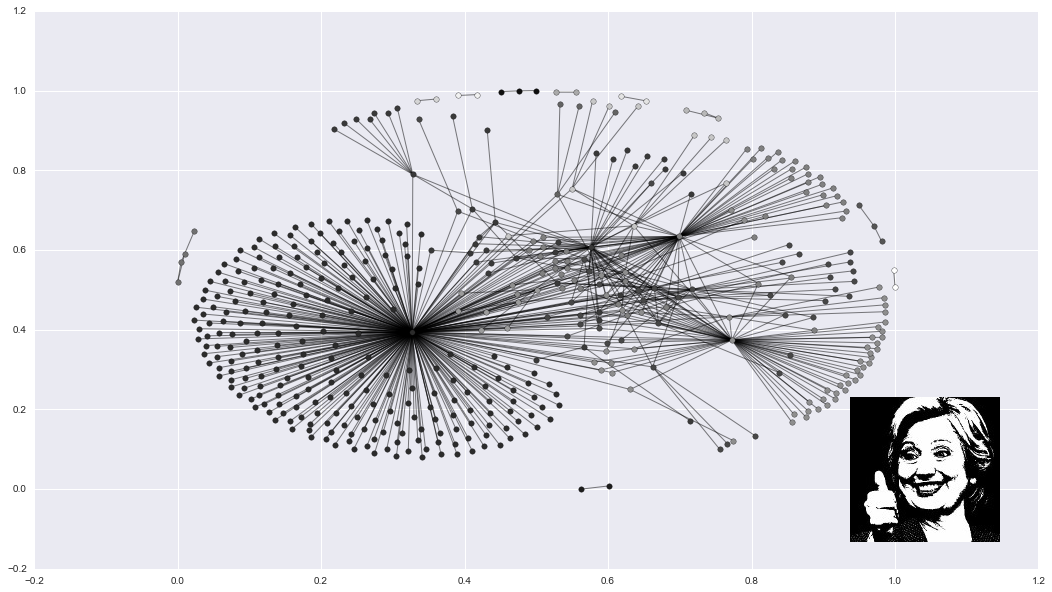

In [14]:
import community as coty

# Compute the best partitions
partition = coty.best_partition(G)

# Draw resultin graph
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 30,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
fig = plt.gcf()
fig.set_size_inches(18, 10)

im = Image.open('hillary_mask_2.jpg')
fig.figimage(im, 850, 50,zorder=10)

plt.show()

In [15]:
print('Sanity check: ', len(list(G.nodes())) == len(partition))

Sanity check:  True


In [16]:
partition_table = graph_table_clean.copy()

partition_table['Community'] = partition_table.apply(lambda row: partition[row['SenderPersonId']], axis=1)
partition_table = partition_table[['Community', 'ExtractedBodyText']]

partition_table.head(10)

,Community,ExtractedBodyText
Id,,
1,3,NaN
3,9,Thx
4,9,Thx
5,9,NaN
6,2,"H <hrod17@clintonemail.com>\nFriday, March 11,..."
7,2,Pis print.\n-•-...-^\nH < hrod17@clintonernail...
8,9,NaN
9,2,"H <hrod17@clintonemail.corn>\nFriday, March 11..."
10,3,FYI


In [17]:
partition_table['Community'].value_counts()

2     2884
9     2152
8     1750
3     1156
4      834
13     377
10      62
6       37
12       5
7        5
15       2
5        2
0        2
11       1
17       1
1        1
16       1
14       1
Name: Community, dtype: int64

In [114]:
# Some communites got dropped when cleaning out NaN values, which is ok, since they were micro communities only consisting of emails with no bodies

group_partitions = partition_table.dropna().groupby('Community')
communities = group_partitions['ExtractedBodyText'].apply(lambda row: ' '.join(row)).reset_index()

communities

,Community,ExtractedBodyText
0,2,"H <hrod17@clintonemail.com>\nFriday, March 11,..."
1,3,FYI Fyi\nB6\n— — Fyi I asked to attend your sv...
2,4,"Anne-Marie Slaughter\nSunday, March 13, 2011 9..."
3,6,My hair is getting whiter by the minute watchi...
4,7,"Cc: Cheryl, Doug, Justin\nThere is a context s..."
5,8,http://religion.b1ogs.cnn.com/20 1 2/09/13/my-...
6,9,"Thx Thx _ .....\nFrom Randolph, Lawrence M\nSe..."
7,10,"Madam Secretary, here is our latest draft of F..."
8,13,Just e-mailed me to say he is at his hotel in ...
9,14,"Gentlemen, for your information below.\nWerner..."


In [115]:
communities['ExtractedBodyText'] = communities['ExtractedBodyText'].apply(word_tokenize)

In [116]:
communities.head()

,Community,ExtractedBodyText
0,2,"[H, <, hrod17, @, clintonemail.com, >, Friday,..."
1,3,"[FYI, Fyi, B6, —, —, Fyi, I, asked, to, attend..."
2,4,"[Anne-Marie, Slaughter, Sunday, ,, March, 13, ..."
3,6,"[My, hair, is, getting, whiter, by, the, minut..."
4,7,"[Cc, :, Cheryl, ,, Doug, ,, Justin, There, is,..."


In [117]:
communities['ExtractedBodyText'] = communities['ExtractedBodyText'].apply(clean_tokens)

In [118]:
pd.Series([1,1,2,2,3]).value_counts().head(1).keys

<bound method Series.keys of 2    2
dtype: int64>

In [124]:
def get_20_most_frequent(token_list):
    return np.array(pd.Series(token_list).value_counts(ascending=False).head(20).keys())

communities['Most_common_words'] = communities['ExtractedBodyText'].apply(get_20_most_frequent)

most_common = communities.drop('ExtractedBodyText', axis=1)

_ = most_common['Most_common_words'].apply(print)

['call' 'would' 'know' 'also' 'state' 'time' 'print' 'like' 'could' 'want'
 'need' 'talk' 'work' 'tomorrow' 'back' 'think' 'good' 'department' 'today'
 'discuss']
['state' 'would' 'said' 'united' 'department' 'agreement' 'also' 'people'
 'case' 'president' 'house' 'information' 'government' 'work' 'call'
 'subject' 'secretary' 'date' 'today' 'security']
['state' 'said' 'would' 'also' 'work' 'think' 'president' 'know'
 'department' 'time' 'good' 'policy' 'house' 'secretary' 'foreign' 'like'
 'people' 'last' 'security' 'government']
['said' 'place' 'first' 'time' 'people' 'vote' 'home' 'state' 'life'
 'republican' 'director' 'city' 'foundation' 'would' 'book' 'staff' 'many'
 'bill' 'congress' 'could']
['people' 'work' 'could' 'government' 'plan' 'would' 'though' 'committee'
 'prince' 'least' 'also' 'settlement' 'port' 'security' 'needs' 'ensure'
 'local' 'help' 'health' 'think']
['call' 'said' 'would' 'also' 'want' 'tomorrow' 'know' 'today' 'talk'
 'meeting' 'state' 'time' 'secretary' 'b

## Assignment
1. Generate a word cloud based on the raw corpus -- I recommend you to use the [Python word_cloud library](https://github.com/amueller/word_cloud).
With the help of `nltk` (already available in your Anaconda environment), implement a standard text pre-processing 
pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and
cons (if any) of the two word clouds you generated.

2. Find all the mentions of world countries in the whole corpus, using the `pycountry` utility (*HINT*: remember that
there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.)
Perform sentiment analysis on every email message using the demo methods in the `nltk.sentiment.util` module. Aggregate 
the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level)
that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo
methods from the sentiment analysis module -- can you find substantial differences?

3. Using the `models.ldamodel` module from the [gensim library](https://radimrehurek.com/gensim/index.html), run topic
modeling over the corpus. Explore different numbers of topics (varying from 5 to 50), and settle for the parameter which
returns topics that you consider to be meaningful at first sight.

4. *BONUS*: build the communication graph (unweighted and undirected) among the different email senders and recipients
using the `NetworkX` library. Find communities in this graph with `community.best_partition(G)` method from the 
[community detection module](http://perso.crans.org/aynaud/communities/index.html). Print the most frequent 20 words used
by the email authors of each community. Do these word lists look similar to what you've produced at step 3 with LDA?
Can you identify clear discussion topics for each community? Discuss briefly the obtained results.
